#Fundamental Risk Return Portfolio

In [1]:
import numpy as np
import pandas as pd

In [2]:
stockFileName = '/content/DJIA_Apr112014_Apr112019.csv'
rows = 1259
columns = 29

In [3]:
df = pd.read_csv(stockFileName, nrows=rows)

In [4]:
assetLabels = df.columns[1:columns+1].tolist()
print(assetLabels)

['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM']


In [5]:
stockPrice = df.iloc[0:, 1:]
print(stockPrice.shape)
print(stockPrice)

(1259, 29)
            AAPL         AXP          BA         CAT       CSCO         CVX  \
0      74.230003   84.540001  122.070000  101.449997  22.459999  117.029999   
1      74.525711   85.500000  123.250000  102.779999  22.850000  118.699997   
2      73.994286   86.040001  124.269997  102.500000  22.889999  120.300003   
3      74.144287   87.400002  126.040001  102.930000  23.030001  121.830002   
4      74.991432   86.220001  127.919998  102.830002  23.209999  123.680000   
...          ...         ...         ...         ...        ...         ...   
1254  197.000000  110.959999  391.929993  140.360001  55.209999  126.419998   
1255  200.100006  110.699997  374.519989  139.820007  55.490002  126.680000   
1256  199.500000  109.849998  369.040009  136.350006  55.180000  125.540001   
1257  200.619995  110.160004  364.940002  137.529999  55.820000  125.489998   
1258  198.949997  109.849998  370.160004  138.869995  55.599998  125.989998   

             DIS          GS          HD

In [6]:
def StockReturnsComputing(StockPrice, Rows, Columns):

  StockReturn = np.zeros([Rows-1, Columns])
  for j in range(Columns):
    for i in range(Rows-1):
      StockReturn[i,j] = ((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])*100

  return StockReturn

In [7]:
stockPriceArray = np.asarray(stockPrice)
[Rows, Cols] = stockPriceArray.shape
stockReturns = StockReturnsComputing(stockPriceArray, Rows, Cols)
print('Daily returns of selective Dow 30 stocks \n', stockReturns)

Daily returns of selective Dow 30 stocks 
 [[ 0.39836722  1.13555594  0.96665847 ...  2.19420472  1.15032288
   1.17866004]
 [-0.71307606  0.63158012  0.82758377 ...  0.51774632 -0.64616182
   0.83793071]
 [ 0.20271971  1.5806613   1.42432127 ...  0.22724132  0.44225288
   1.27685651]
 ...
 [-0.29985306 -0.76784013 -1.46320094 ... -1.01707408 -0.54419126
  -1.28915663]
 [ 0.561401    0.28220847 -1.11099255 ...  0.01834495  0.92207517
  -0.45160747]
 [-0.83241852 -0.2814143   1.43037266 ... -1.96294082  1.20482432
   0.47817436]]


In [9]:
#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(stockReturns, axis = 0)
print('Mean returns of Dow Stocks:\n',  meanReturns)
covReturns = np.cov(stockReturns, rowvar=False)
print('Variance-covariance matrix of returns of Dow Stocks:\n')
print(covReturns)

Mean returns of Dow Stocks:
 [ 0.09027598  0.02910022  0.09966449  0.0386567   0.0809993   0.01551509
  0.03975381  0.03313877  0.08479014 -0.01611022  0.07274221  0.03154811
  0.06041058  0.01915697  0.05653419  0.04422144  0.03579986  0.09974359
  0.08008644  0.03375828  0.02514231  0.04254659  0.09548076  0.01871582
  0.10128134  0.02314321 -0.00168528  0.02946248 -0.0061016 ]
Variance-covariance matrix of returns of Dow Stocks:

[[2.37512857 0.67159954 0.96196299 1.04226142 0.99890235 0.66413311
  0.68002487 0.9540385  0.72630968 0.70945859 1.07333017 0.48572094
  0.8251006  0.30601011 0.45823283 0.73218    0.53433977 1.22660419
  0.77524223 0.5444771  0.41917661 0.50943202 0.77433417 0.69274799
  1.0086701  0.29354661 0.69735896 0.44587945 0.63272823]
 [0.67159954 1.64817768 0.80008198 0.9502813  0.70010508 0.63080612
  0.56872139 1.06463549 0.65826615 0.66251941 0.73789772 0.47196466
  1.00101545 0.30743029 0.35037656 0.65268493 0.55568077 0.7945144
  0.68112631 0.54156063 0.3447

In [10]:
stockFileName = '/content/DJIAkpf1Apr2016to20193YBeta.csv'
marketFileName = '/content/DJIAMarketDataApr2016to20193YBeta.csv'
stockRows = 756
stockColumns = 15
marketRows = 756
marketColumns = 7

dfStock = pd.read_csv(stockFileName,  nrows= stockRows)
dfMarket = pd.read_csv(marketFileName, nrows = marketRows)

assetLabels = dfStock.columns[1:stockColumns+1].tolist()
print('Portfolio stocks\n', assetLabels)

stockData = dfStock.iloc[0:, 1:]
marketData = dfMarket.iloc[0:, [4]]

arrayStockData = np.asarray(stockData)
[sRows, sCols]=arrayStockData.shape
stockReturns = StockReturnsComputing(arrayStockData, sRows, sCols)

arrayMarketData = np.asarray(marketData)
[mRows, mCols]=arrayMarketData.shape
marketReturns = StockReturnsComputing(arrayMarketData, mRows, mCols)

beta= []
Var = np.var(marketReturns, ddof =1)
for i in range(stockColumns):
    CovarMat = np.cov(marketReturns[:,0], stockReturns[:, i ])
    Covar  = CovarMat[1,0]
    beta.append(Covar/Var)

print('Asset Betas:  \n')
for data in beta:
    print('{:9.3f}'.format(data))

Portfolio stocks
 ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA']
Asset Betas:  

    1.134
    1.087
    1.392
    1.527
    1.154
    0.767
    1.317
    0.937
    0.976
    1.115
    0.460
    0.554
    0.735
    0.950
    0.850


In [11]:
weights = np.array([0.09, 0.07, 0.03, 0.02, 0.07, 0.06, 0.04, 0.07, 0.11, \
                    0.08, 0.09, 0.07, 0.05, 0.11, 0.04])
assetBeta = np.array([1.13, 1.09, 1.39, 1.53, 1.15, 0.77, 1.32, 0.94, 0.98,\
                      1.12, 0.46, 0.55, 0.74, 0.95, 0.85])

meanReturns = np.mean(stockReturns, axis = 0)
covReturns = np.cov(stockReturns, rowvar=False)

portfolioRisk = np.matmul((np.matmul(weights,covReturns)), np.transpose(weights))

annualizedRisk  =   np.sqrt(portfolioRisk*251)

portfolioReturn = np.matmul(np.array(meanReturns),weights.T)

annualizedReturn = 251*np.array(portfolioReturn)

portfolioBeta = np.matmul(assetBeta,weights.T)

print("\n Annualized Portfolio Risk: %4.2f" % annualizedRisk,"%")
print("\n Annualized Expected Portfolio Return: %4.2f" % annualizedReturn,"%")
print("\n Portfolio Beta:%4.2f" % portfolioBeta)


 Annualized Portfolio Risk: 12.54 %

 Annualized Expected Portfolio Return: 14.94 %

 Portfolio Beta:0.95


# Finance Data Wrangling

In [12]:
def EmptyRowsElimination(dfAssetPrices):

    [Rows, Columns] = dfAssetPrices.shape
    dFrame = dfAssetPrices.iloc[0:Rows, 0:Columns]

    dFClean = dFrame.dropna(axis =0, how ='all')
    return dFClean

In [13]:
#empty rows elimination from stock prices dataset

StockFileName = '/content/Lesson2FinDataWranglingSampledata.csv'
Rows = 12
Columns = 18

df = pd.read_csv(StockFileName,  nrows= Rows)

assetNames = df.columns[1:Columns+1].tolist()
print(assetNames)

StockData = df.iloc[0:, 1:]
dfClean = EmptyRowsElimination(StockData)
print('\nData cleaning completed!')
[rows, cols]=dfClean.shape
print('Dimensions of the cleaned dataset', dfClean.shape)
print('Cleaned dataset: \n', dfClean)

['RELIANCE INDUSTRIES LIMITED', 'INFOSYS TECHNOLOGIES LTD', 'ITC LTD', 'BHARTI AIRTEL LIMITED', 'HOUSING DEVELOPMENT FINANCE', 'LARSEN & TOUBRO LIMITED', 'ICICI BANK LTD', 'HDFC BANK LIMITED', 'OIL & NATURAL GAS CORP LTD', 'STATE BANK OF INDIA', 'HINDUSTAN UNILEVER LIMITED', 'BHARAT HEAVY ELECTRICALS', 'NTPC LIMITED', 'TATA CONSULTANCY SVS LTD', 'GAIL INDIA LTD', 'CIPLA LTD', 'GRASIM INDUSTRIES LTD', 'TATA POWER CO LTD']

Data cleaning completed!
Dimensions of the cleaned dataset (10, 18)
Cleaned dataset: 
     RELIANCE INDUSTRIES LIMITED  INFOSYS TECHNOLOGIES LTD  ITC LTD  \
0                           NaN                       NaN      NaN   
1                        245.23                    466.28    49.84   
2                        246.77                    462.74    50.05   
3                        244.11                    456.34    48.49   
4                        241.34                    457.45    49.16   
5                        242.15                    464.64    49.97 

In [14]:
#function to fill missing values of daily stock prices
#Mandatory requirements: (1) The dataset should have been cleaned of all empty rows
#before missing values are filled, and
#(2) the opening row of the dataset should not have any empty fields

def FillMissingValues(StockPrices):

    import numpy as np
    print('Fill missing values...')

    [rows, cols] = np.where(np.asarray(np.isnan(StockPrices)))

    for t in range(rows.size):
        i=rows[t]
        j = cols[t]
        if (i-1) >= 0:
            StockPrices.iloc[i,j]= StockPrices.iloc[i-1, j].copy()
        else:
            print('error')
    return StockPrices

In [15]:
#filling missing values of stock prices dataset

StockFileName = '/content/Lesson2MissingValBSE200.csv'
Rows = 11
Columns = 5

df = pd.read_csv(StockFileName,  nrows= Rows)
StockData = df.iloc[0:, 1:]

assetLabels = df.columns[1:Columns+1].tolist()
print('Asset Labels:',assetLabels)

stockDataClean = FillMissingValues(StockData)
print('Filling missing values completed!\n')
print(stockDataClean)

Asset Labels: ['JINDAL SAW LTD', 'BAJAJ HINDUSTHAN LIMITED', 'LAKSHMI MACHINE WORKS LTD', 'GUJARAT MINERAL DEV CORP LTD', 'MOSER BAER INDIA LTD']
Fill missing values...
Filling missing values completed!

    JINDAL SAW LTD  BAJAJ HINDUSTHAN LIMITED  LAKSHMI MACHINE WORKS LTD  \
0            60.85                      5.10                      69.00   
1            60.70                      5.10                      70.00   
2            59.50                      5.10                      70.00   
3            58.80                      5.06                      69.50   
4            57.25                      4.92                      66.49   
5            57.05                      5.25                      69.90   
6            62.35                      5.25                      70.00   
7            66.55                      4.86                      70.00   
8            68.50                      4.86                      70.50   
9            69.65                      4.86  

# Heuristic Portfolio Selection

In [16]:
#read stock prices from a cleaned DJIA dataset
from sklearn.cluster import KMeans

stockFileName = '/content/DJIA_Apr112014_Apr112019.csv'
originalRows = 1259
originalColumns = 29
clusters = 15

df = pd.read_csv(stockFileName,  nrows= originalRows)

assetLabels = df.columns[1:originalColumns+1].tolist()
print(assetLabels)

dfStockPrices = df.iloc[0:, 1:]

arStockPrices = np.asarray(dfStockPrices)
[rows, cols]= arStockPrices.shape
print(rows, cols)
print(arStockPrices)

['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM']
1259 29
[[ 74.230003  84.540001 122.07     ...  64.260002  76.5       96.720001]
 [ 74.525711  85.5      123.25     ...  65.669998  77.379997  97.860001]
 [ 73.994286  86.040001 124.269997 ...  66.010002  76.879997  98.68    ]
 ...
 [199.5      109.849998 369.040009 ...  54.5       98.690002  81.93    ]
 [200.619995 110.160004 364.940002 ...  54.509998  99.599998  81.559998]
 [198.949997 109.849998 370.160004 ...  53.439999 100.800003  81.949997]]


In [17]:
#function for Stock Returns computing
def StockReturnsComputing(StockPrice, Rows, Columns):

    import numpy as np

    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):
        for i in range(Rows-1):
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])

    return StockReturn

In [18]:
#compute daily returns of all stocks in the mini universe
arReturns = StockReturnsComputing(arStockPrices, rows, cols)
print('Size of the array of daily returns of stocks:\n', arReturns.shape)
print('Array of daily returns of stocks\n',  arReturns)

Size of the array of daily returns of stocks:
 (1258, 29)
Array of daily returns of stocks
 [[ 0.00398367  0.01135556  0.00966658 ...  0.02194205  0.01150323
   0.0117866 ]
 [-0.00713076  0.0063158   0.00827584 ...  0.00517746 -0.00646162
   0.00837931]
 [ 0.0020272   0.01580661  0.01424321 ...  0.00227241  0.00442253
   0.01276857]
 ...
 [-0.00299853 -0.0076784  -0.01463201 ... -0.01017074 -0.00544191
  -0.01289157]
 [ 0.00561401  0.00282208 -0.01110993 ...  0.00018345  0.00922075
  -0.00451607]
 [-0.00832419 -0.00281414  0.01430373 ... -0.01962941  0.01204824
   0.00478174]]


In [19]:
#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
print('Mean returns:\n', meanReturns)
covReturns = np.cov(arReturns, rowvar=False)
#set precision for printing results
np.set_printoptions(precision=5, suppress = True)
print('Size of Variance-Covariance matrix of returns:\n', covReturns.shape)
print('Variance-Covariance matrix of returns:\n', covReturns)

Mean returns:
 [ 9.02759761e-04  2.91002178e-04  9.96644943e-04  3.86567003e-04
  8.09992956e-04  1.55150853e-04  3.97538062e-04  3.31387657e-04
  8.47901377e-04 -1.61102228e-04  7.27422090e-04  3.15481134e-04
  6.04105771e-04  1.91569684e-04  5.65341938e-04  4.42214370e-04
  3.57998589e-04  9.97435940e-04  8.00864357e-04  3.37582842e-04
  2.51423106e-04  4.25465919e-04  9.54807585e-04  1.87158182e-04
  1.01281343e-03  2.31432075e-04 -1.68527771e-05  2.94624799e-04
 -6.10160493e-05]
Size of Variance-Covariance matrix of returns:
 (29, 29)
Variance-Covariance matrix of returns:
 [[0.00024 0.00007 0.0001  0.0001  0.0001  0.00007 0.00007 0.0001  0.00007
  0.00007 0.00011 0.00005 0.00008 0.00003 0.00005 0.00007 0.00005 0.00012
  0.00008 0.00005 0.00004 0.00005 0.00008 0.00007 0.0001  0.00003 0.00007
  0.00004 0.00006]
 [0.00007 0.00016 0.00008 0.0001  0.00007 0.00006 0.00006 0.00011 0.00007
  0.00007 0.00007 0.00005 0.0001  0.00003 0.00004 0.00007 0.00006 0.00008
  0.00007 0.00005 0.00003 

In [20]:
#prepare asset parameters for k-means clustering
#reshape for concatenation
meanReturns = meanReturns.reshape(len(meanReturns),1)
assetParameters = np.concatenate([meanReturns, covReturns], axis = 1)
print('Size of the asset parameters for clustering:\n', assetParameters.shape)
print('Asset parameters for clustering:\n', assetParameters)

Size of the asset parameters for clustering:
 (29, 30)
Asset parameters for clustering:
 [[ 0.0009   0.00024  0.00007  0.0001   0.0001   0.0001   0.00007  0.00007
   0.0001   0.00007  0.00007  0.00011  0.00005  0.00008  0.00003  0.00005
   0.00007  0.00005  0.00012  0.00008  0.00005  0.00004  0.00005  0.00008
   0.00007  0.0001   0.00003  0.00007  0.00004  0.00006]
 [ 0.00029  0.00007  0.00016  0.00008  0.0001   0.00007  0.00006  0.00006
   0.00011  0.00007  0.00007  0.00007  0.00005  0.0001   0.00003  0.00004
   0.00007  0.00006  0.00008  0.00007  0.00005  0.00003  0.00005  0.00007
   0.00007  0.00008  0.00003  0.00007  0.00004  0.00005]
 [ 0.001    0.0001   0.00008  0.00023  0.00013  0.00009  0.00008  0.00007
   0.00011  0.00007  0.00008  0.0001   0.00006  0.0001   0.00004  0.00005
   0.00009  0.00006  0.00009  0.00008  0.00005  0.00004  0.00006  0.00007
   0.00009  0.00009  0.00004  0.00007  0.00005  0.00007]
 [ 0.00039  0.0001   0.0001   0.00013  0.00027  0.0001   0.00012  0.00007


In [21]:
#kmeans clustering of assets using the characteristic vector of
#mean return and variance-covariance vector of returns

assetsCluster= KMeans(algorithm='auto',  max_iter=600, n_clusters=clusters)
print('Clustering of assets completed!')
assetsCluster.fit(assetParameters)
centroids = assetsCluster.cluster_centers_
labels = assetsCluster.labels_

print('Centroids:\n', centroids)
print('Labels:\n', labels)

Clustering of assets completed!


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Centroids:
 [[ 0.00082  0.00008  0.00007  0.00008  0.00008  0.00008  0.00006  0.00006
   0.00008  0.00011  0.00006  0.00007  0.00005  0.00007  0.00004  0.00005
   0.00006  0.00005  0.00008  0.00015  0.00005  0.00004  0.00005  0.00007
   0.00006  0.00008  0.00004  0.00007  0.00005  0.00005]
 [ 0.00024  0.00004  0.00003  0.00004  0.00004  0.00005  0.00004  0.00004
   0.00004  0.00004  0.00004  0.00004  0.00004  0.00004  0.00005  0.00004
   0.00004  0.00004  0.00005  0.00004  0.00004  0.00005  0.00004  0.00004
   0.00004  0.00004  0.00006  0.00005  0.00007  0.00004]
 [ 0.00021  0.00007  0.0001   0.00008  0.00011  0.00007  0.00011  0.00006
   0.00009  0.00006  0.00007  0.00008  0.00005  0.00009  0.00003  0.00004
   0.00007  0.00005  0.00008  0.00006  0.00005  0.00004  0.00006  0.00006
   0.00009  0.00008  0.00004  0.00006  0.00004  0.00008]
 [ 0.00042  0.00006  0.00006  0.00007  0.00008  0.00007  0.00006  0.00008
   0.00008  0.00006  0.00006  0.00007  0.00005  0.00008  0.00004  0.00004
   

In [22]:
#fixing asset labels to cluster points
print('Stocks in each of the clusters:\n',)
assets = np.array(assetLabels)
for i in range(clusters):
    print('Cluster', i+1)
    clt  = np.where(labels == i)
    assetsCluster = assets[clt]
    print(assetsCluster)

Stocks in each of the clusters:

Cluster 1
['HD' 'NKE']
Cluster 2
['KO' 'PG' 'VZ' 'WMT']
Cluster 3
['AXP' 'CVX' 'UTX']
Cluster 4
['DIS' 'MMM' 'TRV']
Cluster 5
['BA']
Cluster 6
['WBA']
Cluster 7
['IBM' 'XOM']
Cluster 8
['CAT']
Cluster 9
['CSCO' 'INTC']
Cluster 10
['UNH']
Cluster 11
['AAPL' 'MSFT' 'V']
Cluster 12
['GS']
Cluster 13
['JPM']
Cluster 14
['MCD']
Cluster 15
['JNJ' 'MRK' 'PFE']


# Traditional Methods for Portfolio Construction

In [23]:
#read k portfolio 1 dataset comprising 15 stocks

StockFileName = '/content/DJIA_Apr112014_Apr112019_kpf1.csv'
Rows = 1259
Columns = 15

df = pd.read_csv(StockFileName,  nrows= Rows)

assetLabels = df.columns[1:Columns+1].tolist()
print('k-portfolio 1 asset labels:\n', assetLabels)

dfStockPrices = df.iloc[1:, 1:]

arStockPrices = np.asarray(dfStockPrices)
[rows, cols]= arStockPrices.shape
print('k-portfolio 1 dataset size:\n', rows, cols)
print('k-portfolio 1 stock prices:\n', arStockPrices)

k-portfolio 1 asset labels:
 ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA']
k-portfolio 1 dataset size:
 1258 15
k-portfolio 1 stock prices:
 [[ 74.52571  85.5     123.25    ...  55.57     79.18     65.67   ]
 [ 73.99429  86.04    124.27    ...  56.05     79.51     66.01   ]
 [ 74.14429  87.4     126.04    ...  56.26     78.19     66.16   ]
 ...
 [199.5     109.85    369.04001 ...  80.8     248.78999  54.5    ]
 [200.61999 110.16    364.94    ...  80.82    246.03     54.51   ]
 [198.95    109.85    370.16    ...  79.84    235.42     53.44   ]]


In [24]:
#function to compute stock returns
def StockReturnsComputing(StockPrice, Rows, Columns):

    import numpy as np

    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):
        for i in range(Rows-1):
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])

    return StockReturn

In [25]:
#compute asset returns
arReturns = StockReturnsComputing(arStockPrices, rows, cols)
print('k-portfolio 1 returns:\n', arReturns)

k-portfolio 1 returns:
 [[-0.00713  0.00632  0.00828 ...  0.00864  0.00417  0.00518]
 [ 0.00203  0.01581  0.01424 ...  0.00375 -0.0166   0.00227]
 [ 0.01143 -0.0135   0.01492 ...  0.00373 -0.03082  0.00892]
 ...
 [-0.003   -0.00768 -0.01463 ... -0.00185  0.00016 -0.01017]
 [ 0.00561  0.00282 -0.01111 ...  0.00025 -0.01109  0.00018]
 [-0.00832 -0.00281  0.0143  ... -0.01213 -0.04312 -0.01963]]


In [26]:
#compute mean returns and variance covariance matrix of returns

np.set_printoptions(precision=5, suppress = True)

meanReturns = np.mean(arReturns, axis = 0)
print('Mean returns of k-portfolio 1:\n', meanReturns)
covReturns = np.cov(arReturns, rowvar=False)
print('\nVariance-Covariance matrix of returns of k-portfolio 1: \n')
print('Size  ', covReturns.shape, '\n', covReturns)

Mean returns of k-portfolio 1:
 [ 0.0009   0.00028  0.00099  0.00038  0.0008   0.00039  0.00032  0.00085
 -0.00017  0.00061  0.00019  0.00056  0.00036  0.00095 -0.00003]

Variance-Covariance matrix of returns of k-portfolio 1: 

Size   (15, 15) 
 [[0.00024 0.00007 0.0001  0.0001  0.0001  0.00007 0.0001  0.00007 0.00007
  0.00008 0.00003 0.00005 0.00005 0.00008 0.00007]
 [0.00007 0.00016 0.00008 0.00009 0.00007 0.00006 0.00011 0.00007 0.00007
  0.0001  0.00003 0.00003 0.00006 0.00007 0.00007]
 [0.0001  0.00008 0.00023 0.00013 0.00009 0.00007 0.00011 0.00007 0.00008
  0.0001  0.00004 0.00005 0.00006 0.00007 0.00007]
 [0.0001  0.00009 0.00013 0.00027 0.0001  0.00007 0.00013 0.00008 0.00009
  0.00012 0.00004 0.00005 0.00006 0.00007 0.00007]
 [0.0001  0.00007 0.00009 0.0001  0.00018 0.00007 0.00009 0.00007 0.00008
  0.00009 0.00004 0.00005 0.00006 0.00007 0.00007]
 [0.00007 0.00006 0.00007 0.00007 0.00007 0.00014 0.00008 0.00006 0.00006
  0.00007 0.00003 0.00004 0.00005 0.00006 0.00006]
 [0

In [27]:
#equal weighted portfolio construction: Annualized risk and
#expected annualized portfolio return
#trading days = 251
PortfolioSize = Columns
EqualWeightVector = np.ones((1,PortfolioSize))*(1.0/PortfolioSize)
EqWgtPortfolioRisk = np.sqrt(np.matmul((np.matmul(EqualWeightVector,covReturns)), \
                     np.transpose(EqualWeightVector)))
EqWgtAnnPortfolioRisk = EqWgtPortfolioRisk*np.sqrt(251)*100
EqWgtPortfolioReturn = np.matmul(EqualWeightVector, np.transpose(meanReturns))
EqWgtAnnPortfolioReturn = 251*EqWgtPortfolioReturn * 100

print("Annualized Portfolio Risk :  %4.2f" % EqWgtAnnPortfolioRisk, "%")
print("\nAnnualized Expected Portfolio Return:  %4.2f" %  EqWgtAnnPortfolioReturn,"%")

Annualized Portfolio Risk :  13.68 %

Annualized Expected Portfolio Return:  12.34 %


<ipython-input-27-04fde1f55366>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Annualized Portfolio Risk :  %4.2f" % EqWgtAnnPortfolioRisk, "%")
<ipython-input-27-04fde1f55366>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\nAnnualized Expected Portfolio Return:  %4.2f" %  EqWgtAnnPortfolioReturn,"%")


In [28]:
# Equal weighted portfolio: Diversification Ratio
EqWgtPortfolioAssetStdDev = np.sqrt(np.diagonal(covReturns))
EqWgtPortfolioDivRatio = np.sum(np.multiply(EqWgtPortfolioAssetStdDev, EqualWeightVector)) \
                         / EqWgtPortfolioRisk
print("\n Equal Weighted Portfolio:Diversification Ratio  %4.2f" % EqWgtPortfolioDivRatio)


 Equal Weighted Portfolio:Diversification Ratio  1.53


<ipython-input-28-699e7d1deab3>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\n Equal Weighted Portfolio:Diversification Ratio  %4.2f" % EqWgtPortfolioDivRatio)


In [29]:
#Inverse volatility weighted portfolio construction: Annualized risk and
#Expected annualized portfolio return
#Trading days = 251
InvVolWeightAssets_Risk = np.sqrt(np.diagonal(covReturns))
InvVolWeightAssets_ReciprocalRisk = 1.0/InvVolWeightAssets_Risk
InvVolWeightAssets_ReciprocalRisk_Sum = np.sum(InvVolWeightAssets_ReciprocalRisk)
InvVolWeightAssets_Weights = InvVolWeightAssets_ReciprocalRisk / \
                             InvVolWeightAssets_ReciprocalRisk_Sum
InvVolWeightPortfolio_Risk = np.sqrt(np.matmul((np.matmul(InvVolWeightAssets_Weights,\
                             covReturns)), np.transpose(InvVolWeightAssets_Weights)))

InvVolWeightPortfolio_AnnRisk = np.sqrt(251)* InvVolWeightPortfolio_Risk *100
InvVolWeightPortfolio_AnnReturn = 251* np.matmul(InvVolWeightAssets_Weights,\
                                  np.transpose(meanReturns)) *100

print("Annualized Portfolio Risk: %4.2f" % InvVolWeightPortfolio_AnnRisk,"%\n")
print("Annualized Expected Portfolio Return: %4.2f" % InvVolWeightPortfolio_AnnReturn,"%")

Annualized Portfolio Risk: 13.24 %

Annualized Expected Portfolio Return: 12.13 %


In [30]:
# Inverse volatility weighted portfolio: Diversification Ratio
InvVolWeightAssets_Risk= np.sqrt(np.diagonal(covReturns))
InvVolWeightPortfolioDivRatio = \
np.sum(np.multiply(InvVolWeightAssets_Risk, InvVolWeightAssets_Weights))\
/ InvVolWeightPortfolio_Risk
print("\n Inverse Volatility  Weighted Portfolio:Diversification Ratio %4.2f" \
      % InvVolWeightPortfolioDivRatio)


 Inverse Volatility  Weighted Portfolio:Diversification Ratio 1.54


In [31]:
#identify the "mini" stock universe dataset
StockFileName = '/content/DJIA_Apr112014_Apr112019.csv'
Rows = 1259
Columns = 29

In [32]:
#function obtains maximal return portfolio using linear programming
def MaximizeReturns(MeanReturns, PortfolioSize):

    #dependencies
    from scipy.optimize import linprog
    import numpy as np

    c = (np.multiply(-1, MeanReturns))
    A = np.ones([PortfolioSize,1]).T
    b=[1]
    res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex')

    return res

In [33]:
#function obtains minimal risk portfolio
from scipy import optimize

def MinimizeRisk(CovarReturns, PortfolioSize):

    def  f(x, CovarReturns):
        func = np.matmul(np.matmul(x, CovarReturns), x.T)
        return func

    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b
        return constraintVal

    xinit=np.repeat(0.1, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])

    opt = optimize.minimize (f, x0 = xinit, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)

    return opt

In [34]:
#function obtains Minimal risk and Maximum return portfolios
def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):

    def  f(x,CovarReturns):

        func = np.matmul(np.matmul(x,CovarReturns ), x.T)
        return func

    def constraintEq(x):
        AEq=np.ones(x.shape)
        bEq=1
        EqconstraintVal = np.matmul(AEq,x.T)-bEq
        return EqconstraintVal

    def constraintIneq(x, MeanReturns, R):
        AIneq = np.array(MeanReturns)
        bIneq = R
        IneqconstraintVal = np.matmul(AIneq,x.T) - bIneq
        return IneqconstraintVal


    xinit=np.repeat(0.1, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq},
            {'type':'ineq', 'fun':constraintIneq, 'args':(MeanReturns,R) })
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])

    opt = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                        x0 = xinit,   bounds = bnds, constraints = cons, tol = 10**-3)

    return  opt

In [35]:
# function computes asset returns
def StockReturnsComputing(StockPrice, Rows, Columns):

    import numpy as np

    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):
        for i in range(Rows-1):
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

    return StockReturn

In [36]:
# Obtain optimal portfolio sets that maximize return and minimize risk
StockFileName = '/content/DJIA_Apr112014_Apr112019_kpf1.csv'

Rows = 1259
Columns = 15
portfolioSize = Columns

df = pd.read_csv(StockFileName,  nrows= Rows)

assetLabels = df.columns[1:Columns+1].tolist()
print(assetLabels)

StockData = df.iloc[0:, 1:]

arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)

np.set_printoptions(precision=3, suppress = True)

print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)

['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA']
Mean returns of assets in k-portfolio 1
 [ 0.09   0.029  0.1    0.039  0.081  0.04   0.033  0.085 -0.016  0.06
  0.019  0.057  0.036  0.095 -0.002]
Variance-Covariance matrix of returns
 [[2.375 0.672 0.962 1.042 0.999 0.68  0.954 0.726 0.709 0.825 0.306 0.458
  0.534 0.774 0.697]
 [0.672 1.648 0.8   0.95  0.7   0.569 1.065 0.658 0.663 1.001 0.307 0.35
  0.556 0.718 0.667]
 [0.962 0.8   2.288 1.31  0.89  0.716 1.066 0.747 0.777 0.977 0.381 0.472
  0.578 0.745 0.679]
 [1.042 0.95  1.31  2.733 1.041 0.688 1.321 0.796 0.885 1.169 0.358 0.455
  0.616 0.72  0.681]
 [0.999 0.7   0.89  1.041 1.789 0.713 0.927 0.724 0.817 0.909 0.362 0.477
  0.647 0.656 0.707]
 [0.68  0.569 0.716 0.688 0.713 1.35  0.773 0.586 0.574 0.717 0.302 0.368
  0.466 0.557 0.631]
 [0.954 1.065 1.066 1.321 0.927 0.773 2.114 0.795 0.803 1.554 0.303 0.467
  0.705 0.82  0.819]
 [0.726 0.658 0.747 0.796 0.724 0.586 0.795 1

In [37]:
#Maximal expected portfolio return computation for the k-portfolio
result1 = MaximizeReturns(meanReturns, portfolioSize)
maxReturnWeights = result1.x
maxExpPortfolioReturn = np.matmul(meanReturns.T, maxReturnWeights)
print("Maximal Expected Portfolio Return:   %7.4f" % maxExpPortfolioReturn )

Maximal Expected Portfolio Return:    0.0997


<ipython-input-32-a5e561a13d63>:11: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex')


In [38]:
#expected portfolio return computation for the minimum risk k-portfolio
result2 = MinimizeRisk(covReturns, portfolioSize)
minRiskWeights = result2.x
minRiskExpPortfolioReturn = np.matmul(meanReturns.T, minRiskWeights)
print("Expected Return of Minimum Risk Portfolio:  %7.4f" % minRiskExpPortfolioReturn)

Expected Return of Minimum Risk Portfolio:   0.0361


In [39]:
#compute efficient set for the maximum return and minimum risk portfolios
increment = 0.001
low = minRiskExpPortfolioReturn
high = maxExpPortfolioReturn

xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]

while (low < high):

    result3 = MinimizeRiskConstr(meanReturns, covReturns, portfolioSize, low)
    xOptimal.append(result3.x)
    expPortfolioReturnPoint.append(low)
    low = low+increment

xOptimalArray = np.array(xOptimal)

minRiskPoint = np.diagonal(np.matmul((np.matmul(xOptimalArray,covReturns)),\
                                     np.transpose(xOptimalArray)))
riskPoint =   np.sqrt(minRiskPoint*251)

retPoint = 251*np.array(expPortfolioReturnPoint)

print("Size of the  efficient set:", xOptimalArray.shape )
print("Optimal weights of the efficient set portfolios: \n", xOptimalArray)
print("Annualized Risk and Return of the efficient set portfolios: \n", \
                                                np.c_[riskPoint, retPoint])

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Size of the  efficient set: (64, 15)
Optimal weights of the efficient set portfolios: 
 [[ 0.028  0.039  0.023  0.017  0.026  0.103  0.017  0.05   0.032  0.021
   0.319  0.192  0.062  0.047  0.025]
 [ 0.028  0.039  0.023  0.017  0.026  0.108  0.017  0.051  0.032  0.022
   0.311  0.192  0.063  0.047  0.025]
 [ 0.029  0.039  0.024  0.017  0.027  0.108  0.017  0.052  0.031  0.022
   0.309  0.192  0.062  0.048  0.024]
 [ 0.03   0.039  0.025  0.017  0.027  0.107  0.017  0.053  0.03   0.022
   0.306  0.192  0.062  0.049  0.024]
 [ 0.031  0.038  0.024  0.016  0.028  0.086  0.016  0.059  0.028  0.022
   0.316  0.197  0.06   0.056  0.023]
 [ 0.033  0.039  0.027  0.017  0.029  0.103  0.017  0.06   0.028  0.023
   0.294  0.185  0.064  0.056  0.023]
 [ 0.034  0.039  0.028  0.017  0.03   0.102  0.017  0.063  0.027  0.023
   0.29   0.184  0.064  0.059  0.023]
 [ 0.035  0.038  0.03   0.017  0.031  0.101  0.017  0.066  0.026  0.024
   0.285  0.183  0.064  0.062  0.022]
 [ 0.036  0.038  0.031  0.018  0

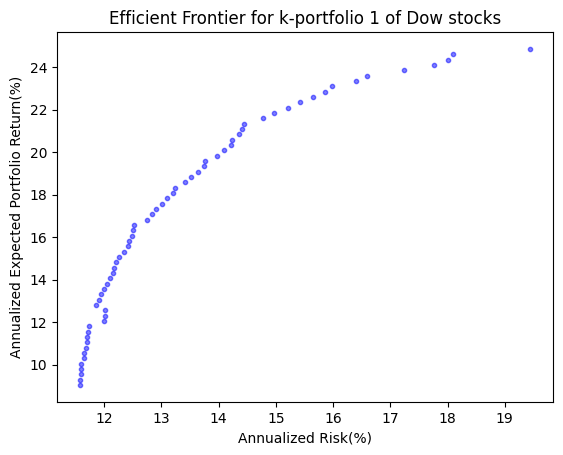

In [40]:
#Graph Efficient Frontier
import matplotlib.pyplot as plt

NoPoints = riskPoint.size

colours = "blue"
area = np.pi*3

plt.title('Efficient Frontier for k-portfolio 1 of Dow stocks')
plt.xlabel('Annualized Risk(%)')
plt.ylabel('Annualized Expected Portfolio Return(%)' )
plt.scatter(riskPoint, retPoint, s=area, c=colours, alpha =0.5)
plt.show()

In [41]:
#function to undertake Sharpe Ratio maximization subject to
#basic constraints of the portfolio

def MaximizeSharpeRatioOptmzn(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):

    def  f(x, MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
        funcDenomr = np.sqrt(np.matmul(np.matmul(x, CovarReturns), x.T) )
        funcNumer = np.matmul(np.array(MeanReturns),x.T)-RiskFreeRate
        func = -(funcNumer / funcDenomr)
        return func

    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b
        return constraintVal

    xinit=np.repeat(0.33, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])

    opt = optimize.minimize (f, x0 = xinit, args = (MeanReturns, CovarReturns,\
                             RiskFreeRate, PortfolioSize), method = 'SLSQP',  \
                             bounds = bnds, constraints = cons, tol = 10**-3)

    return opt

In [42]:
# function computes asset returns
def StockReturnsComputing(StockPrice, Rows, Columns):

    import numpy as np

    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):        # j: Assets
        for i in range(Rows-1):     # i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

    return StockReturn

In [43]:
#obtain mean and variance-covariance matrix of returns for k-portfolio 1

StockFileName = '/content/DJIA_Apr112014_Apr112019_kpf1.csv'
Rows = 1259
Columns = 15

df = pd.read_csv(StockFileName,  nrows= Rows)

assetLabels = df.columns[1:Columns+1].tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

StockData = df.iloc[0:, 1:]

arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

np.set_printoptions(precision=3, suppress = True)

meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA']

Mean Returns:
 [ 0.09   0.029  0.1    0.039  0.081  0.04   0.033  0.085 -0.016  0.06
  0.019  0.057  0.036  0.095 -0.002]

Variance-Covariance Matrix of Returns:
 [[2.375 0.672 0.962 1.042 0.999 0.68  0.954 0.726 0.709 0.825 0.306 0.458
  0.534 0.774 0.697]
 [0.672 1.648 0.8   0.95  0.7   0.569 1.065 0.658 0.663 1.001 0.307 0.35
  0.556 0.718 0.667]
 [0.962 0.8   2.288 1.31  0.89  0.716 1.066 0.747 0.777 0.977 0.381 0.472
  0.578 0.745 0.679]
 [1.042 0.95  1.31  2.733 1.041 0.688 1.321 0.796 0.885 1.169 0.358 0.455
  0.616 0.72  0.681]
 [0.999 0.7   0.89  1.041 1.789 0.713 0.927 0.724 0.817 0.909 0.362 0.477
  0.647 0.656 0.707]
 [0.68  0.569 0.716 0.688 0.713 1.35  0.773 0.586 0.574 0.717 0.302 0.368
  0.466 0.557 0.631]
 [0.954 1.065 1.066 1.321 0.927 0.773 2.114 0.795 0.803 1.554 0.303 0.467
  0.705 0.82  0.819]
 [0.726 0.658 0.747 0.796 0.724 0.5

In [44]:
#obtain maximal Sharpe Ratio for k-portfolio 1 of Dow stocks

portfolioSize = Columns

Rf=3
annRiskFreeRate = Rf/100

r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0))

xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)


xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251)
annRet = 251*np.array(expReturn)
maxSharpeRatio = (annRet-Rf)/annRisk

np.set_printoptions(precision=3, suppress = True)

print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.26]] 
Annualized Risk (%):   [[14.749]] 
Annualized Expected Portfolio Return(%):   [21.584]

Optimal weights (%):
 [[13.694]
 [ 0.   ]
 [17.744]
 [ 0.   ]
 [12.151]
 [ 0.   ]
 [ 0.   ]
 [19.058]
 [ 0.   ]
 [ 1.151]
 [ 0.   ]
 [13.654]
 [ 0.   ]
 [22.547]
 [ 0.   ]]


In [45]:
# function computes asset returns
def StockReturnsComputing(StockPrice, Rows, Columns):

    import numpy as np

    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):
        for i in range(Rows-1):
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])*100

    return StockReturn

In [46]:
#compute stock returns for k-portfolio 1 and market returns to compute asset betas

stockFileName = '/content/DJIAkpf1Apr2016to20193YBeta.csv'
marketFileName = '/content/DJIAMarketDataApr2016to20193YBeta.csv'
stockRows = 756
stockColumns = 15
marketRows = 756
marketColumns = 7

dfStock = pd.read_csv(stockFileName,  nrows= stockRows)
dfMarket = pd.read_csv(marketFileName, nrows = marketRows)
stockData = dfStock.iloc[0:, 1:]
marketData = dfMarket.iloc[0:, [4]]

assetLabels = dfStock.columns[1:stockColumns+1].tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

arStockPrices = np.asarray(stockData)
[sRows, sCols]=arStockPrices.shape
arStockReturns = StockReturnsComputing(arStockPrices, sRows, sCols)

arMarketPrices = np.asarray(marketData)
[mRows, mCols]=arMarketPrices.shape
arMarketReturns = StockReturnsComputing(arMarketPrices, mRows, mCols)

Asset labels of k-portfolio 1: 
 ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA']


In [47]:
#compute betas of the assets in k-portfolio 1
beta= []
Var = np.var(arMarketReturns, ddof =1)
for i in range(stockColumns):
    CovarMat = np.cov(arMarketReturns[:,0], arStockReturns[:, i ])
    Covar  = CovarMat[1,0]
    beta.append(Covar/Var)

print('Asset Betas:\n')
for data in beta:
    print('{:9.3f}'.format(data))

Asset Betas:

    1.134
    1.087
    1.392
    1.527
    1.154
    0.767
    1.317
    0.937
    0.976
    1.115
    0.460
    0.554
    0.735
    0.950
    0.850


In [48]:
#obtain mean returns and variance-covariance matrix of returns of k-portfolio 1
#historical dataset: DJIA Index April 2014 to April 2019

StockFileName = 'DJIA_Apr112014_Apr112019_kpf1.csv'
Rows = 1259
Columns = 15

df = pd.read_csv(StockFileName,  nrows= Rows)

assetLabels = df.columns[1:Columns+1].tolist()
print('Asset labels for k-portfolio 1: \n', assetLabels)

stockData = df.iloc[0:, 1:]

arStockPrices = np.asarray(stockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

np.set_printoptions(precision=3, suppress = True)

meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels for k-portfolio 1: 
 ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA']

Mean Returns:
 [ 0.09   0.029  0.1    0.039  0.081  0.04   0.033  0.085 -0.016  0.06
  0.019  0.057  0.036  0.095 -0.002]

Variance-Covariance Matrix of Returns:
 [[2.375 0.672 0.962 1.042 0.999 0.68  0.954 0.726 0.709 0.825 0.306 0.458
  0.534 0.774 0.697]
 [0.672 1.648 0.8   0.95  0.7   0.569 1.065 0.658 0.663 1.001 0.307 0.35
  0.556 0.718 0.667]
 [0.962 0.8   2.288 1.31  0.89  0.716 1.066 0.747 0.777 0.977 0.381 0.472
  0.578 0.745 0.679]
 [1.042 0.95  1.31  2.733 1.041 0.688 1.321 0.796 0.885 1.169 0.358 0.455
  0.616 0.72  0.681]
 [0.999 0.7   0.89  1.041 1.789 0.713 0.927 0.724 0.817 0.909 0.362 0.477
  0.647 0.656 0.707]
 [0.68  0.569 0.716 0.688 0.713 1.35  0.773 0.586 0.574 0.717 0.302 0.368
  0.466 0.557 0.631]
 [0.954 1.065 1.066 1.321 0.927 0.773 2.114 0.795 0.803 1.554 0.303 0.467
  0.705 0.82  0.819]
 [0.726 0.658 0.747 0.796 0.724 0.

In [49]:
#function to handle bi-criterion portfolio optimization with constraints

def BiCriterionFunctionOptmzn(MeanReturns, CovarReturns, RiskAversParam, PortfolioSize):

    def  f(x, MeanReturns, CovarReturns, RiskAversParam, PortfolioSize):
        PortfolioVariance = np.matmul(np.matmul(x, CovarReturns), x.T)
        PortfolioExpReturn = np.matmul(np.array(MeanReturns),x.T)
        func = RiskAversParam * PortfolioVariance - (1-RiskAversParam)*PortfolioExpReturn
        return func

    def ConstraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b
        return constraintVal

    def ConstraintIneqUpBounds(x):
        A= [[0,0,0,0,0, 1,0,1,1,0, 1,1,1,1,1], [1,1,1,1,1,0,1,0,0,1,0,0,0,0,0]]
        bUpBounds =np.array([0.6,0.4]).T
        constraintValUpBounds = bUpBounds-np.matmul(A,x.T)
        return constraintValUpBounds

    def ConstraintIneqLowBounds(x):
        A= [[0,0,0,0,0,1,0,1,1,0, 1,1,1,1,1], [1,1,1,1,1,0,1,0,0,1,0,0,0,0,0]]
        bLowBounds =np.array([0.01, 0.01]).T
        constraintValLowBounds = np.matmul(A,x.T)-bLowBounds
        return constraintValLowBounds

    xinit=np.repeat(0.01, PortfolioSize)
    cons = ({'type': 'eq', 'fun':ConstraintEq}, \
            {'type':'ineq', 'fun': ConstraintIneqUpBounds},\
            {'type':'ineq', 'fun': ConstraintIneqLowBounds})
    bnds = [(0,0.1),(0,0.1), (0,0.1), (0,0.1), (0,0.1), (0,1), (0,0.1), (0,1),\
            (0,1), (0,0.1), (0,1),  (0,1),(0,1),(0,1),(0,1)]

    opt = optimize.minimize (f, x0 = xinit, args = ( MeanReturns, CovarReturns,\
                                                    RiskAversParam, PortfolioSize), \
                             method = 'SLSQP',  bounds = bnds, constraints = cons, \
                             tol = 10**-3)
    print(opt)
    return opt

In [50]:
#obtain optimal portfolios for the constrained portfolio optimization model
#Maximize returns and Minimize risk with fully invested, bound and class constraints

portfolioSize = Columns

xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]

for points in range(0,60):
    riskAversParam = points/60.0
    result = BiCriterionFunctionOptmzn(meanReturns, covReturns, riskAversParam, \
                                       portfolioSize)
    xOptimal.append(result.x)

xOptimalArray = np.array(xOptimal)
minRiskPoint = np.diagonal(np.matmul((np.matmul(xOptimalArray,covReturns)),\
                                     np.transpose(xOptimalArray)))
riskPoint =   np.sqrt(minRiskPoint*251)
expPortfolioReturnPoint= np.matmul(xOptimalArray, meanReturns )
retPoint = 251*np.array(expPortfolioReturnPoint)

np.set_printoptions(precision=3, suppress = True)

print("Optimal weights of the efficient set portfolios\n:", xOptimalArray)
print("\nAnnualized Risk and Return of the efficient set portfolios:\n",\
      np.c_[riskPoint, retPoint])

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.0871814657741943
       x: [ 1.000e-01  6.319e-18 ...  3.366e-01  7.196e-17]
     nit: 6
     jac: [-9.028e-02 -2.910e-02 ... -9.548e-02  1.685e-03]
    nfev: 96
    njev: 6
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.06831630616273264
       x: [ 1.000e-01  1.688e-17 ...  2.744e-01  0.000e+00]
     nit: 5
     jac: [-5.751e-02 -5.364e-03 ... -6.197e-02  2.474e-02]
    nfev: 80
    njev: 5
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.0522821794930713
       x: [ 1.000e-01  7.546e-17 ...  2.548e-01  1.654e-17]
     nit: 5
     jac: [-2.532e-02  1.770e-02 ... -3.029e-02  4.718e-02]
    nfev: 80
    njev: 5
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.036810831036578735
       x: [ 1.000e-01  0.000e+00 ...  2.358e-01  0.000e+00]
     nit: 5
     jac: [ 6.193e-03  4.005e-02 ... -

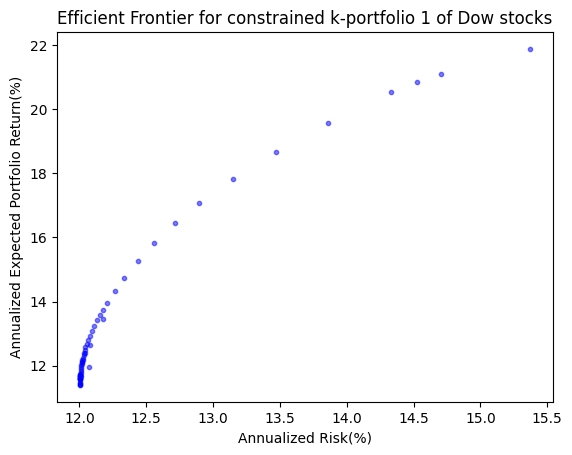

In [51]:
import matplotlib.pyplot as plt

NoPoints = riskPoint.size

colours = "blue"
area = np.pi*3

plt.title('Efficient Frontier for constrained k-portfolio 1 of Dow stocks')
plt.xlabel('Annualized Risk(%)')
plt.ylabel('Annualized Expected Portfolio Return(%)' )
plt.scatter(riskPoint, retPoint, s=area, c=colours, alpha =0.5)
plt.show()